<a href="https://colab.research.google.com/github/wonkr/DeepLearningStudy/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-02-06 02:04:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.6MB/s    in 2.2s    

2023-02-06 02:04:26 (29.6 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):
  shutil.rmtree('/content/cats_and_dogs_filtered/')
  print('/content/cats_and_dogs_filtered/ is removed!!!')

In [5]:
# 압축파일 풀기
import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:
  target_file.extractall('/content/cats_and_dogs_filtered/')

In [11]:
# 모델 구축
IMG_WIDTH = 224
IMG_HEIGHT = 224

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


87910968/87910968 [==============================] - 3s 0us/step


In [12]:
model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 16)                32784     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 21,835,602
Trainable params: 21,801,170
Non-trainable params: 34,432
_______________________________________

In [13]:
# ImageDataGenerator 정의

In [20]:
train_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train'

test_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation'

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10, width_shift_range=0.1,
                                    height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

test_data_gen = ImageDataGenerator(rescale=1./255)


In [21]:
train_data = train_data_gen.flow_from_directory(train_dir, batch_size=32, 
                                                color_mode='rgb', shuffle=True, class_mode='categorical', 
                                                target_size=(IMG_WIDTH, IMG_HEIGHT))

test_data = test_data_gen.flow_from_directory(test_dir, batch_size=32,
                                              color_mode='rgb', shuffle=True, class_mode='categorical', 
                                              target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
print(train_data.class_indices.items())
print(test_data.class_indices.items())

dict_items([('cats', 0), ('dogs', 1)])
dict_items([('cats', 0), ('dogs', 1)])


In [24]:
# model compile & training

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['accuracy'])

In [26]:
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

save_file_name = './cats_and_dogs_filtered_colab.h5'

checkpoint = ModelCheckpoint(save_file_name, monitor='val_loss',
                             verbose=1, save_best_only=True, mode='auto')

earlystopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(train_data, epochs=30, validation_data=test_data, callbacks=[checkpoint, earlystopping])

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.8550
Epoch 1: val_loss improved from inf to 0.05244, saving model to ./cats_and_dogs_filtered_colab.h5
63/63 [==============================] - 55s 596ms/step - loss: 0.3505 - accuracy: 0.8550 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9545
Epoch 2: val_loss improved from 0.05244 to 0.04980, saving model to ./cats_and_dogs_filtered_colab.h5
63/63 [==============================] - 34s 541ms/step - loss: 0.1457 - accuracy: 0.9545 - val_loss: 0.0498 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9755
Epoch 3: val_loss improved from 0.04980 to 0.04080, saving model to ./cats_and_dogs_filtered_colab.h5
63/63 [==============================] - 33s 525ms/step - loss: 0.0781 - accuracy: 0.9755 - val_loss: 0.0408 - val_accuracy: 0.9830
Epoch 4/30
63/63 [==

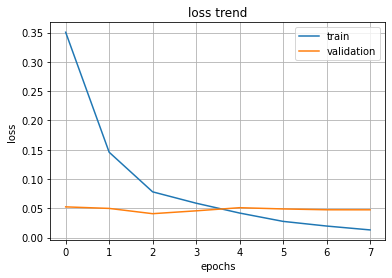

In [29]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

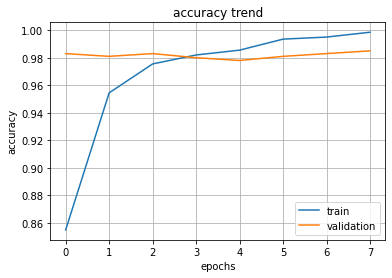

In [30]:
import matplotlib.pyplot as plt

plt.title('accuracy trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

In [32]:
# Test data load and predict

In [44]:
import os
import shutil

import cv2
import glob

test_img_list = []

test_img_name_list = glob.glob('/content/test_image_dir/*')
print(len(test_img_name_list))
for i in range(len(test_img_name_list)):
  src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
  src_img = cv2.resize(src_img, dsize=(IMG_WIDTH, IMG_HEIGHT))

  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

  dst_img = dst_img/255.0
  test_img_list.append(dst_img)

1


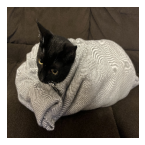

In [48]:
plt.figure(figsize=(8,6))

for i in range(len(test_img_list)):
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.imshow(test_img_list[i])

plt.show()

In [49]:
for i in range(len(test_img_list)):
  print(test_img_list[i].shape)

(224, 224, 3)


1/1 [==============================] - 2s 2s/step


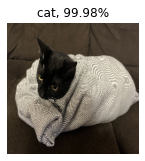

In [51]:
import numpy as np

pred = model.predict(np.array(test_img_list))

class_name=['cat', 'dog']
plt.figure(figsize=(8,6))

for i in range(len(pred)):
  plt.subplot(2,3,i+1)
  prediction=str(class_name[np.argmax(pred[i])])
  probility = '{0:0.2f}'.format(100*max(pred[i]))
  title_str = prediction + ', ' + probility + '%'
  plt.axis('off')
  plt.title(title_str)
  plt.imshow(test_img_list[i])

plt.show()